In [6]:
import os
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

In [3]:
# Database connection parameters
db_params = {
    'dbname': 'movie_db', 
    'user': 'postgres', 
    'password': os.environ['POSTGRES_PASSWORD'],
    'host': '49.13.1.33',
    'port': '5333'
}

# Connection
conn = psycopg2.connect(**db_params)

# Helper function to query the database
def query_db(sql_query, conn):
    return pd.read_sql_query(sql_query, conn)

# Queries
movie_lengths_stats = query_db("SELECT MIN(runtime) as min_runtime, MAX(runtime) as max_runtime, AVG(runtime) as avg_runtime FROM Movies", conn)


movies_per_genre = query_db("SELECT Genres.name, COUNT(MovieGenres.genre_id) as num_movies FROM MovieGenres JOIN Genres ON MovieGenres.genre_id = Genres.id GROUP BY Genres.name", conn)


movie_stats = query_db("""
SELECT
    AVG(runtime) as avg_runtime,
    AVG(budget) as avg_budget,
    AVG(revenue) as avg_revenue,
    MIN(release_date) as earliest_release,
    MAX(release_date) as latest_release
FROM Movies
""", conn)

C:\Users\mario\AppData\Local\Temp\ipykernel_17092\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


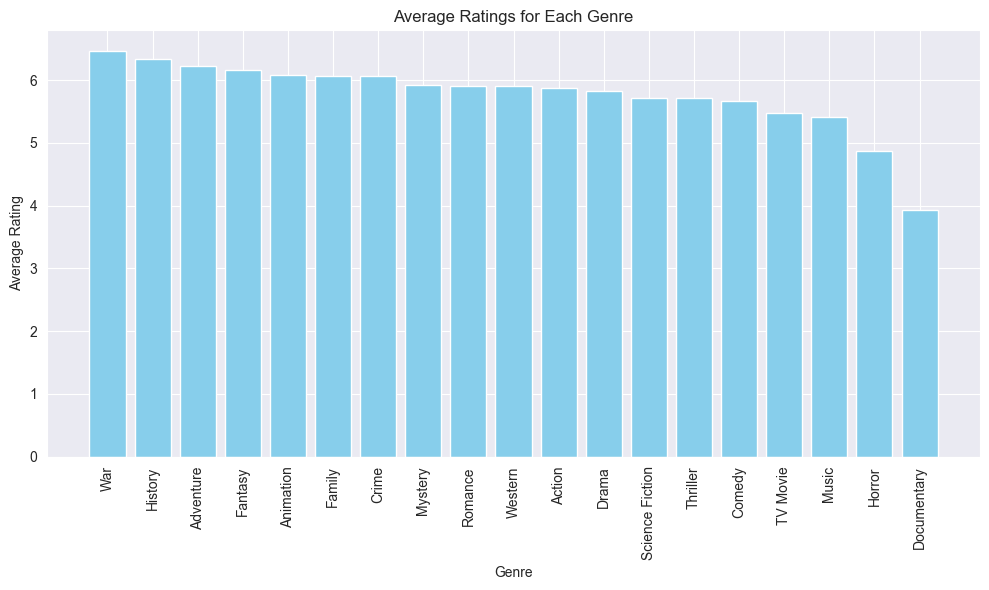

In [10]:
average_popularity_genre= query_db("""
 SELECT g.name AS genre_name, AVG(mp.vote_average) AS avg_vote
    FROM Genres g
    JOIN MovieGenres mg ON g.id = mg.genre_id
    JOIN movies_popularity mp ON mg.movie_id = mp.movie_id
    GROUP BY g.name
    ORDER BY avg_vote DESC
 """, conn)

plt.figure(figsize=(10, 6))
plt.bar(average_popularity_genre.genre_name, average_popularity_genre.avg_vote, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Each Genre')
plt.xticks(rotation=90)
plt.tight_layout()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


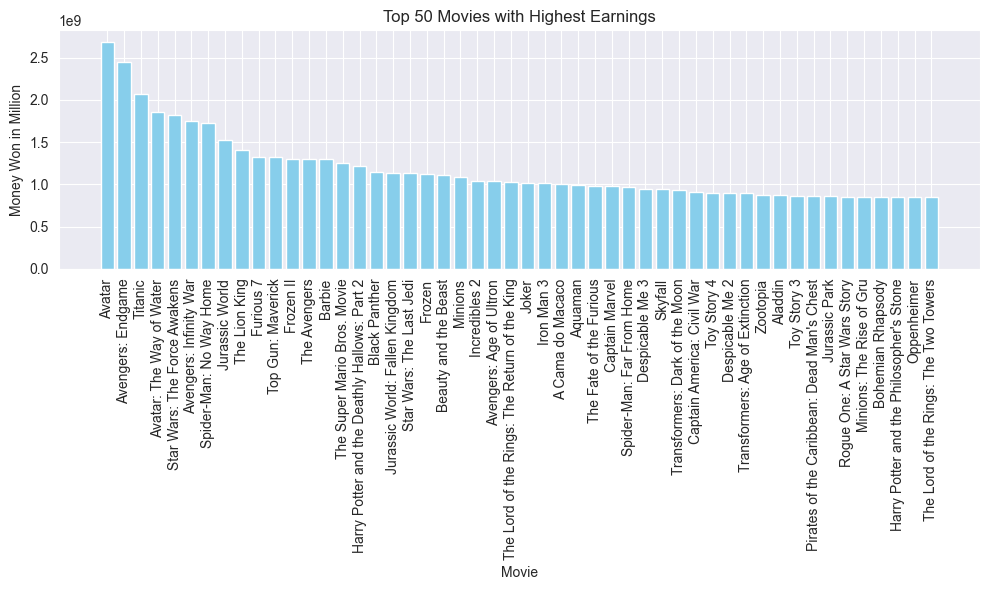

In [11]:
highest_earning= query_db("""
  SELECT title as title, revenue - budget AS profit
  FROM Movies
  ORDER BY profit desc 
  LIMIT 50;
""", conn)


plt.figure(figsize=(10, 6))
plt.bar(highest_earning.title, highest_earning.profit, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Money Won in Million')
plt.title('Top 50 Movies with Highest Earnings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


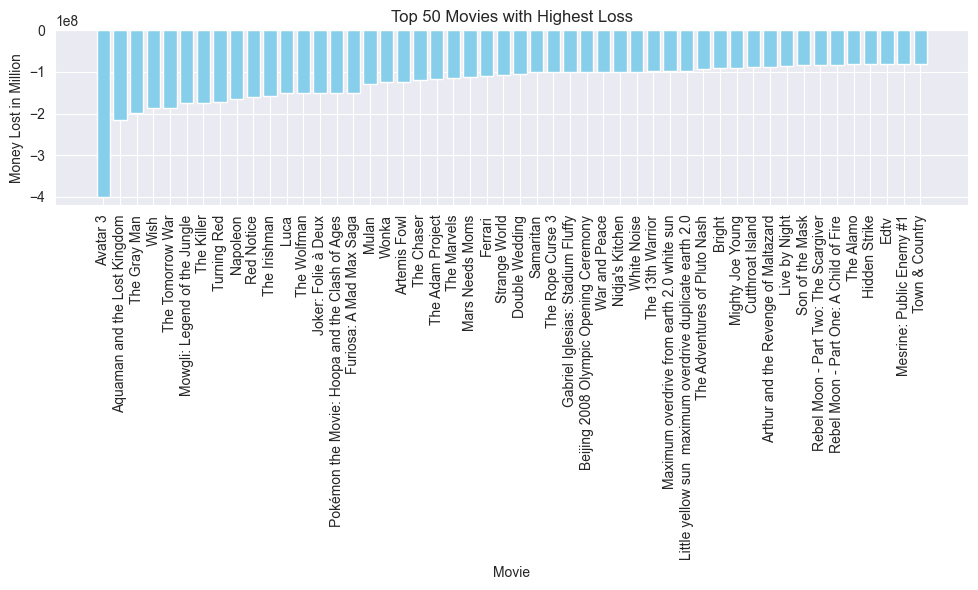

In [12]:
highest_loss= query_db("""
  SELECT title as title, revenue - budget AS profit_loss
  FROM Movies
  ORDER BY profit_loss asc 
  LIMIT 50;
""", conn)


plt.figure(figsize=(10, 6))
plt.bar(highest_loss.title, highest_loss.profit_loss, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Money Lost in Million')
plt.title('Top 50 Movies with Highest Loss')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


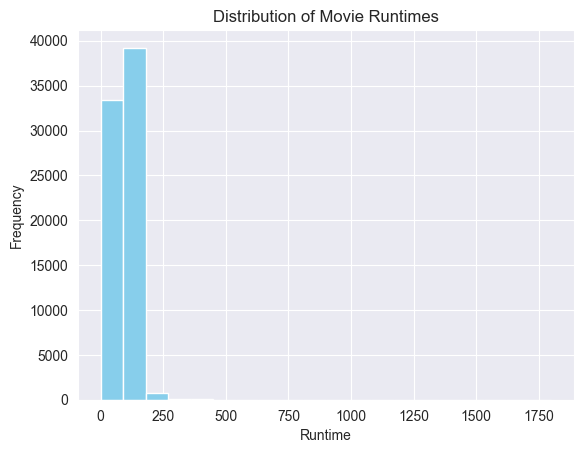

In [13]:
import matplotlib.pyplot as plt

movie_runtimes = query_db("""SELECT runtime FROM Movies""", conn)

plt.hist(movie_runtimes, bins=20, color='skyblue')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


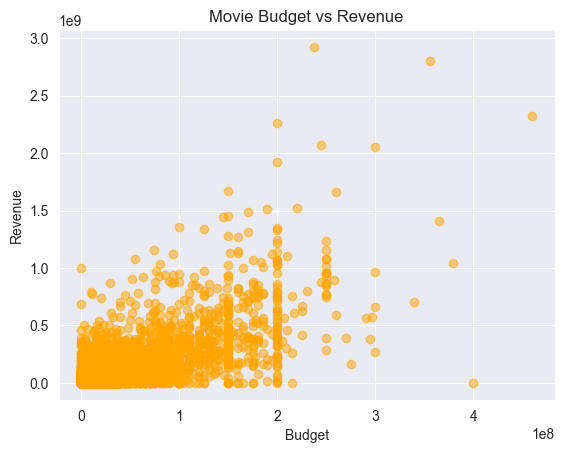

In [30]:
budget_revenue = query_db("""SELECT budget, revenue FROM Movies""", conn)


plt.scatter(budget_revenue.budget, budget_revenue.revenue, alpha=0.5, color='orange')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Movie Budget vs Revenue')
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


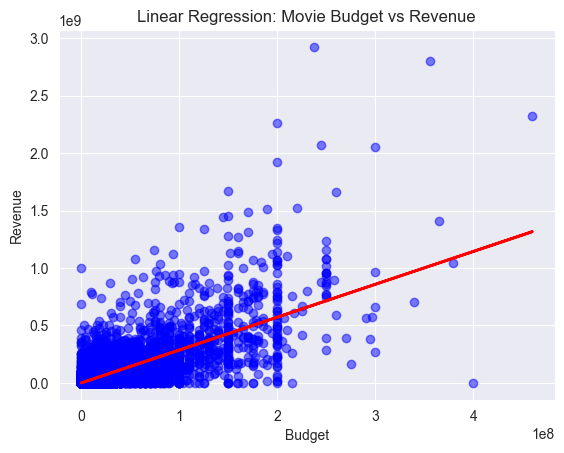

In [32]:
from sklearn.linear_model import LinearRegression

budget_revenue = query_db("""SELECT budget, revenue FROM Movies WHERE budget IS NOT NULL AND revenue IS NOT NULL""", conn)

budget_revenue['budget'] = pd.to_numeric(budget_revenue['budget'])
budget_revenue['revenue'] = pd.to_numeric(budget_revenue['revenue'])

budget = budget_revenue['budget']
revenue = budget_revenue['revenue']

X = np.array(budget).reshape(-1, 1)
y = np.array(revenue)

model = LinearRegression()
model.fit(X, y)

predicted_revenue = model.predict(X)

plt.scatter(budget, revenue, alpha=0.5, color='blue')
plt.plot(budget, predicted_revenue, color='red', linewidth=2)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Linear Regression: Movie Budget vs Revenue')
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


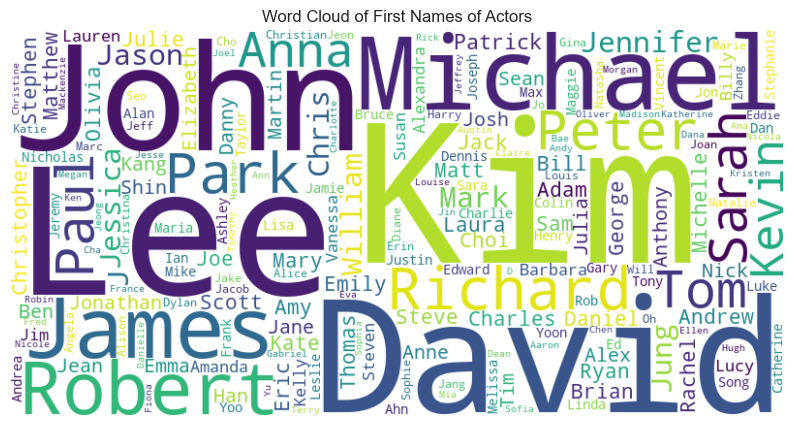

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

first_names_query = query_db("""
    SELECT 
        SPLIT_PART(name, ' ', 1) AS first_name
    FROM 
        people
""", conn)

all_first_names = ' '.join(first_names_query['first_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_first_names)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of First Names of Actors')
plt.show()



C:\Users\mario\AppData\Local\Temp\ipykernel_3368\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


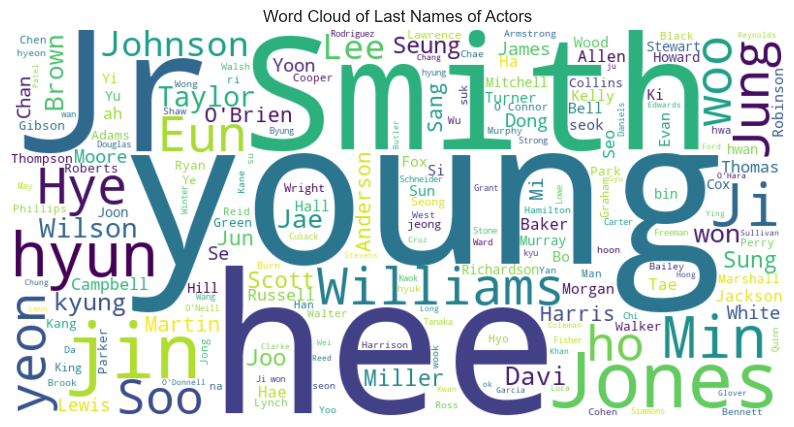

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

first_names_query = query_db("""
    SELECT 
        SPLIT_PART(name, ' ', -1) AS last_name
    FROM 
        people
""", conn)

all_first_names = ' '.join(first_names_query['last_name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_first_names)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Last Names of Actors')
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_17784\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)
C:\Users\mario\AppData\Local\Temp\ipykernel_17784\1814987103.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(people_popularity_df['popularity'], shade=True)


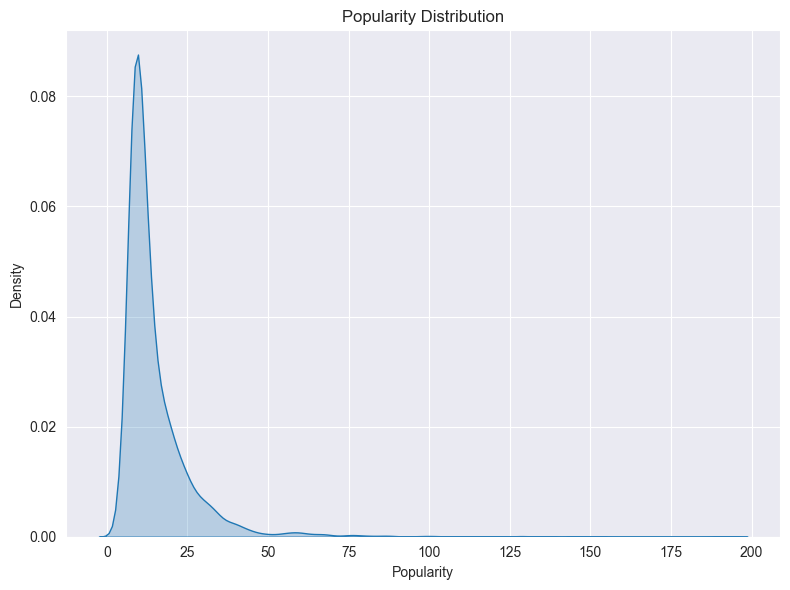

In [23]:
people_popularity_df = query_db("""SELECT * FROM people_popularity""", conn)
plt.figure(figsize=(8, 6))
sns.kdeplot(people_popularity_df['popularity'], shade=True)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.tight_layout()


C:\Users\mario\AppData\Local\Temp\ipykernel_17784\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


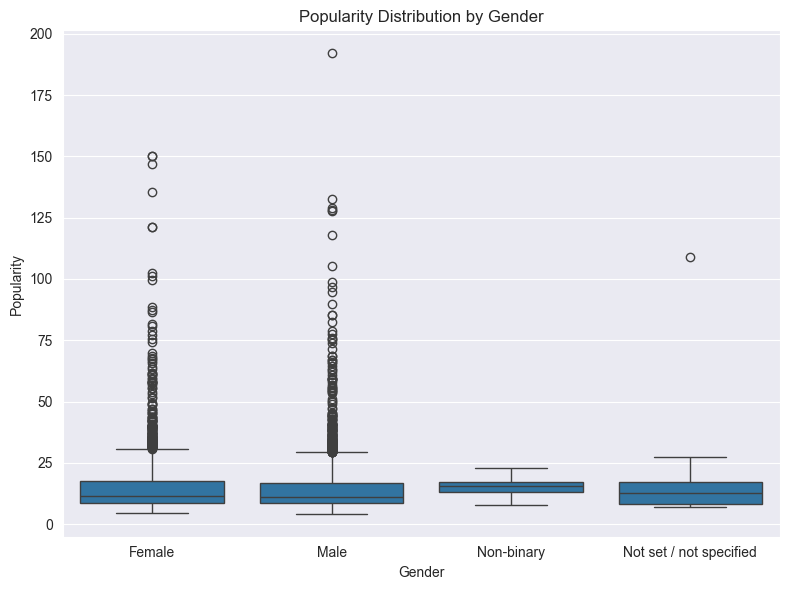

In [9]:
gender_labels = {
    0: 'Not set / not specified',
    1: 'Female',
    2: 'Male',
    3: 'Non-binary'
}

gender_popularity = query_db("""
    SELECT CASE 
        WHEN gender = 0 THEN 'Not set / not specified'
        WHEN gender = 1 THEN 'Female'
        WHEN gender = 2 THEN 'Male'
        WHEN gender = 3 THEN 'Non-binary'
        ELSE 'Unknown'
        END AS gender_label,
        popularity
    FROM people
    JOIN people_popularity ON people.id = people_popularity.person_id
""", conn)

plt.figure(figsize=(8, 6))
sns.boxplot(x='gender_label', y='popularity', data=gender_popularity)
plt.title('Popularity Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Popularity')
plt.tight_layout()

plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_17784\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)


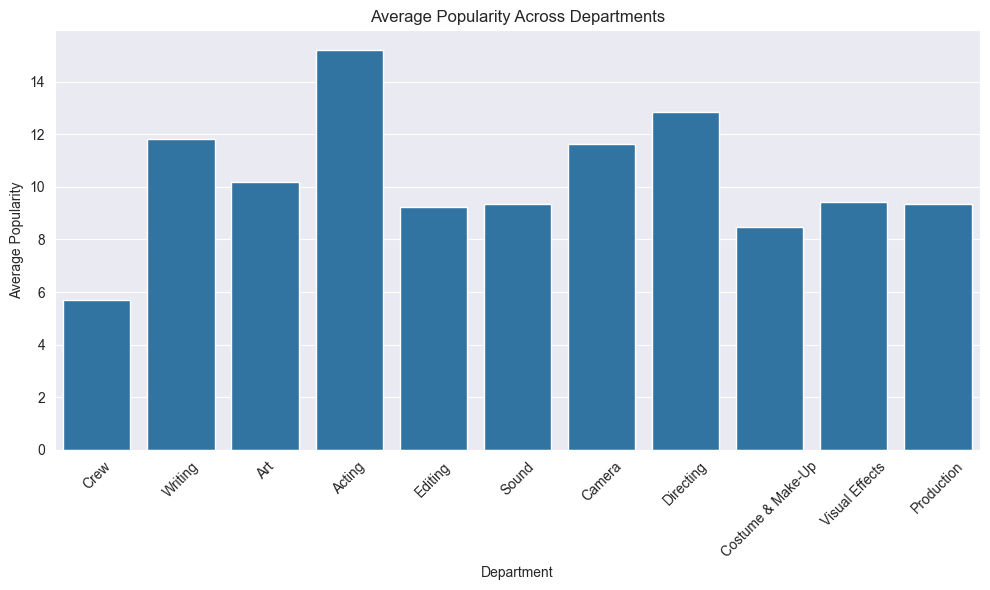

In [12]:
dept_avg_popularity = query_db("""
    SELECT known_for_department, AVG(popularity) as avg_popularity
    FROM people
    JOIN people_popularity ON people.id = people_popularity.person_id
    GROUP BY known_for_department
""", conn)
plt.figure(figsize=(10, 6))
sns.barplot(x='known_for_department', y='avg_popularity', data=dept_avg_popularity)
plt.title('Average Popularity Across Departments')
plt.xlabel('Department')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\mario\AppData\Local\Temp\ipykernel_17784\3675305573.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(sql_query, conn)
C:\Users\mario\AppData\Local\Temp\ipykernel_17784\3559792993.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_popularity', y='name', data=top_actors_query, palette='viridis')


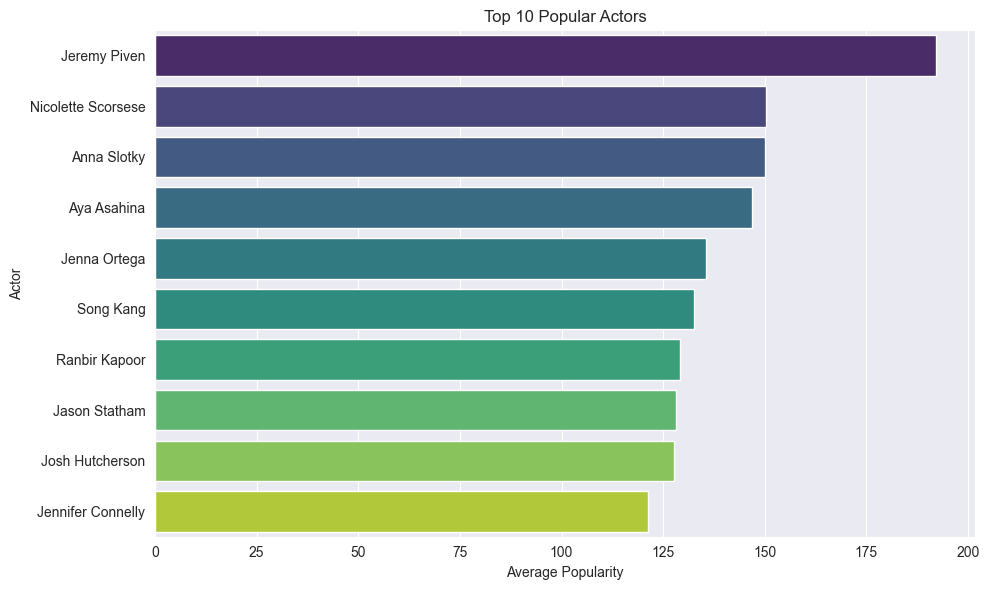

In [24]:
top_actors_query = query_db("""
    SELECT p.name, AVG(pp.popularity) AS avg_popularity
    FROM people p
    JOIN people_popularity pp ON p.id = pp.person_id
    GROUP BY p.name
    ORDER BY avg_popularity DESC
    LIMIT 10
""", conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='avg_popularity', y='name', data=top_actors_query, palette='viridis')
plt.title('Top 10 Popular Actors')
plt.xlabel('Average Popularity')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_17092\3675305573.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



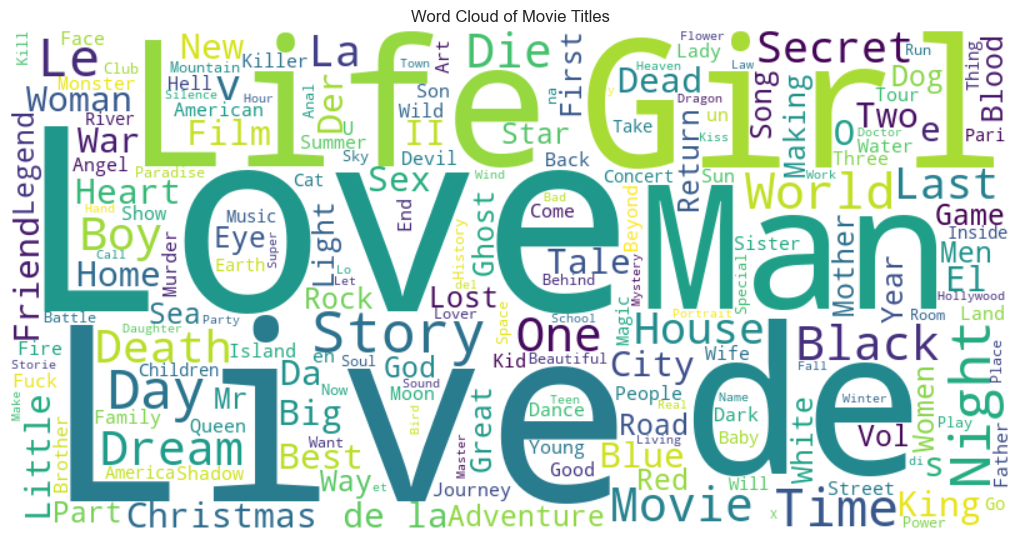

C:\Users\mario\AppData\Local\Temp\ipykernel_17092\3675305573.py:15: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



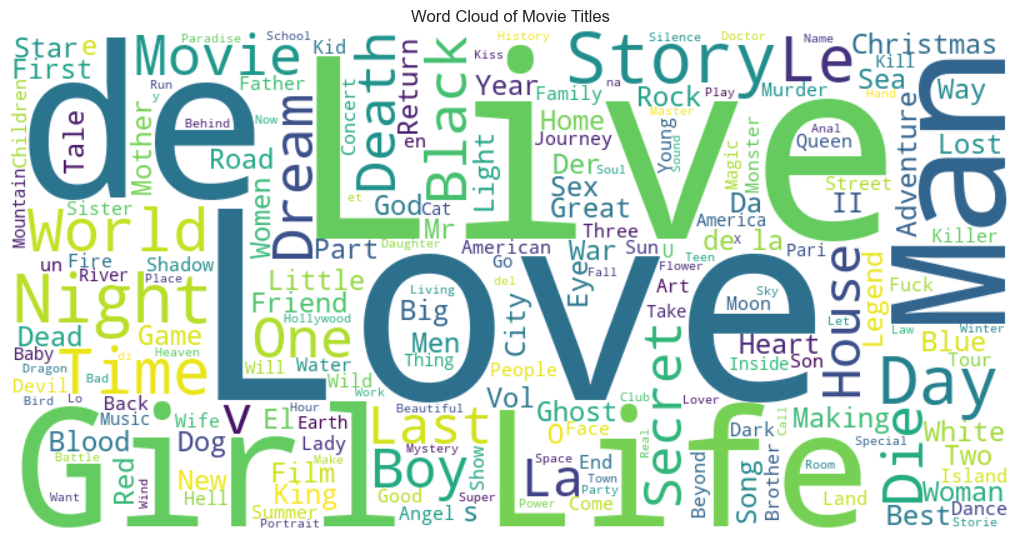